In [3]:
import os
import json
import numpy as np

from tools.utils import work_json, plot_data
from tools.free_energy_computation import get_delta_fe
from tools.vle_computation import compute_gamma, compute_vapor_mole_fraction, compute_equilibrium_pressure, compute_equilibrium_temperatures

In [6]:
########################## Workflow using solvation free energies to predict VLE for binary mixtures ##########################

#### System settings ####

## Define the mixture name ##

main         = "../Mixtures"
mixture      = "ethanol_water"
components   = mixture.split("_")

## Specify either if mixture at constant pressure or constant temperature (pressures in bar / temperature in K)

dict_key     = "1"

## Create results folder ##

if not os.path.exists( main+"/"+mixture+"/"+dict_key+"/results" ): os.makedirs( main+"/"+mixture+"/"+dict_key+"/results" )

## Read in reference dict to get infos about simulation and reference values ##

ref_dict     = work_json("input_files/reference_dict.json")

# Molecular masses for each component in g/mol #
Mol_masses   = np.array( ref_dict[mixture]["Mol_masses"] )

## Reference values for given mixture ##

# Liquid mole fraction #
x_ref = ref_dict[mixture][dict_key]["post_processing"]["x_ref"]
# Vapor mole fraction #
y_ref = ref_dict[mixture][dict_key]["post_processing"]["y_ref"]
# Equilibrium vapor pressure #
p_ref = ref_dict[mixture][dict_key]["post_processing"]["p_ref"]
# Equilibrium tempeature #
t_ref = ref_dict[mixture][dict_key]["post_processing"]["t_ref"]

# SAFT Rereference for activities #
gamma_x_ref = ref_dict[mixture][dict_key]["post_processing"]["gamma_x_ref"]
gamma1_ref  = ref_dict[mixture][dict_key]["post_processing"]["gamma1_ref"]
gamma2_ref  = ref_dict[mixture][dict_key]["post_processing"]["gamma2_ref"]

#### Free energy settings ####

## Show detailed information from free energy computation ##

show         = True

## Dictionary containing all the import settings for post processing ##

settings = {  

    # Mixture name #
    "mixture"       : mixture,
    "names"         : [ components, components[::-1] ],
    "components"    : components,

    # Charge flag for molecules that are charged (necessary to prevent evaluation of #
    # coulomb interactions for unsymetric charged mixtures) #
    "charged"       : ref_dict[mixture]["charged"],

    # Unique key specifing the p-x or T-x phase equilibrium (and boolean if p_x or T_x)#
    "unique_key"    : dict_key,
    "p_x"           : True if np.any(p_ref) else False,

    # Temperatures and compositions at which the simulations were conducted #
    "temperatures"  : ref_dict[mixture][dict_key]["temp"], #
    "compositions"  : ref_dict[mixture][dict_key]["post_processing"]["x1"], #

    # Specifications for thermodynamic integration path (two entries for vdW and Coulomb part #
    "sim_lambdas"   : ref_dict[mixture][dict_key]["lambdas"],
    "sim_txts"      : [ "sim_lj", 
                        "sim_coul" ],
    "sim_plts"      : [ "LJ", 
                        "coul" ],
    "sim_txt_files" : [ "fep_lj.fep", 
                        "fep_coul.fep" ],
    "delta"         : 0.0001, # Used to evaluate the numerical derivative
    "both_ways"     : False,   # If forward and backward derivative is computed
    "adapt"         : False,
    "fraction"      : 0.0,    # Fraction of simulation results that is evaluated

    ## Specification for post processing ##

    # Free energy method #
    "free_eng_method" : "2d_multi_fidelity",
    # Number of intermediate compositions between 0 and 1 #
    "no_composition"  : 21,

    # Simulation folder and results save paths #
    "sim_path"        : main+"/"+mixture+"/"+dict_key+"/mix_%s_%s%s/%s/x%.1f/TI/%s_%d/%s%d%d",
    "dG_save_path"    : main+"/"+mixture+"/"+dict_key+"/results/%s_solvation_free_energy.png",
    "gamma_save_path" : main+"/"+mixture+"/"+dict_key+"/results/gamma_x.png",
    "y1_save_path"    : main+"/"+mixture+"/"+dict_key+"/results/y_x.png",
    "p_save_path"     : main+"/"+mixture+"/"+dict_key+"/results/p_x.png",
    "T_save_path"     : main+"/"+mixture+"/"+dict_key+"/results/T_x.png",
    "json_save_path"  : main+"/"+mixture+"/"+dict_key+"/results/free_eng_pp_results.json",
    
    # Low fidelity model that should be used  #
    "lf_databank"   : { "vdW": "input_files/lf_vdw_data_mix.json", "coulomb": "input_files/lf_coul_data_mix.json" },
    "lf_mixture"    : { "vdW": "mie1_mie2", "coulomb": "ethanol_water" },
    "lf_unique_key" : { "vdW": "100_0", "coulomb": "1" },

    # Initial lengthscales for kernel in two dimensions (if wanted, if not just use empty lists) #
    "mf_length"     : [ [ 0.2, 5.0 ], [ 0.3, 3.0 ] ], #[ [ ], [ ] ], #
    "fix_length"    : False,
    "fix_hf_noise"  : True,
    "plot_3d"       : True
}


vdW part of the free solvation energy


Gather simulation data for component: ethanol

Composition 0.0
Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

Gather simulation data for component: water

Composition 0.0
Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

2D Multi-fidelity modeling for component: ethanol

Optimization restart 1/2, f = 173.7000557957561
Optimization restart 2/2, f = 235.97186907304956

Low fidelity variance: 390.332
Low fidelity lengthscales: 0.663, 3.444
High fidelity variance: 248.298
High fidelity lengthscales: 0.549, 3.374
Phi parameter: 0.571
Low fidelity noise: 0.000
High fidelity noise: 0.039


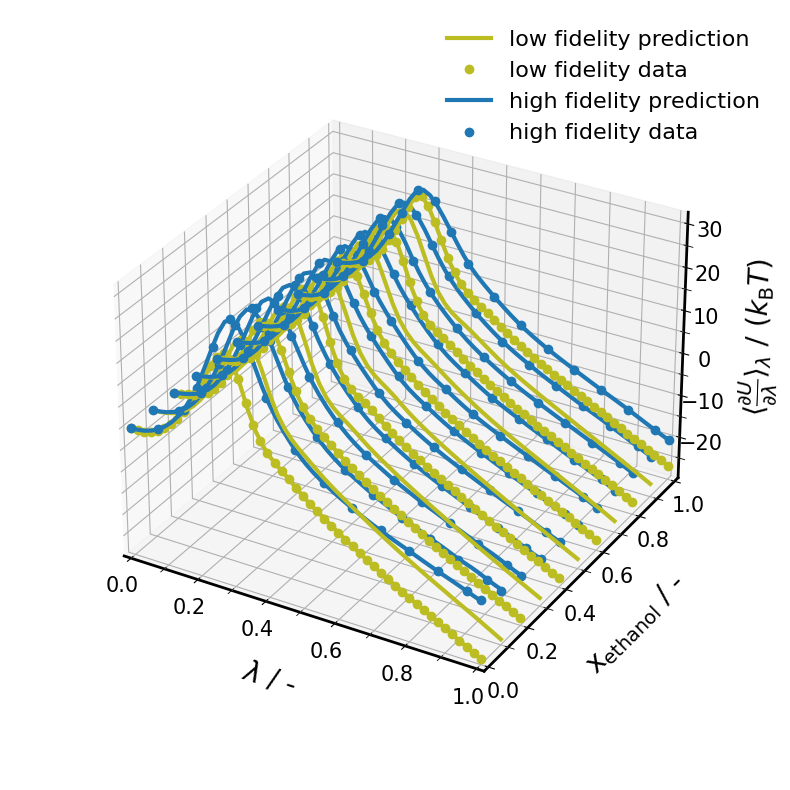


2D Multi-fidelity modeling for component: water

Optimization restart 1/2, f = -68.8727956375657
Optimization restart 2/2, f = -68.8727957544956

Low fidelity variance: 651.686
Low fidelity lengthscales: 0.889, 7.666
High fidelity variance: 49.719
High fidelity lengthscales: 0.331, 3.784
Phi parameter: -0.015
Low fidelity noise: 0.000
High fidelity noise: 0.010


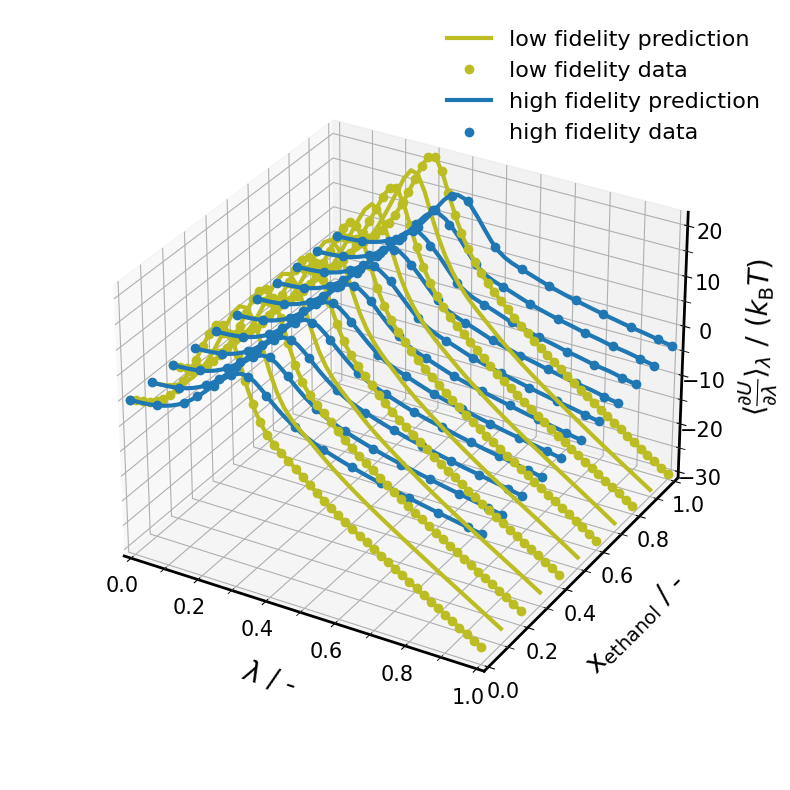

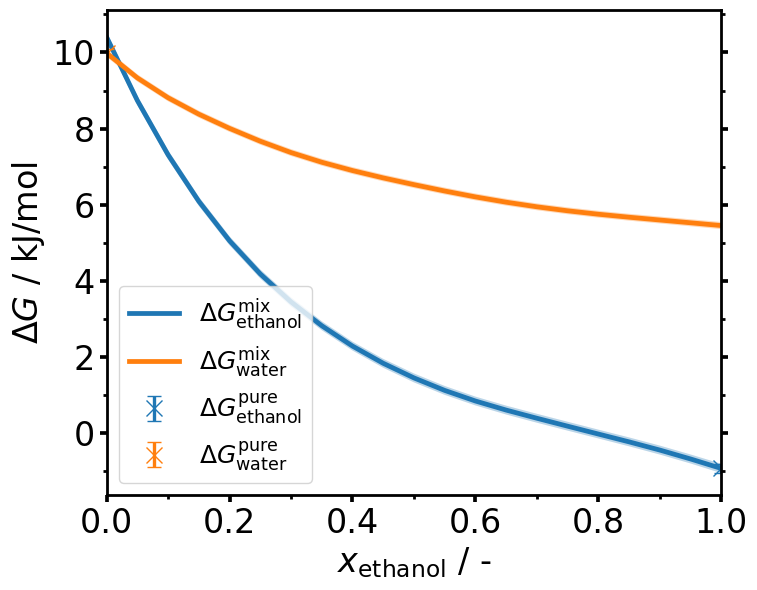


coulomb part of the free solvation energy


Gather simulation data for component: ethanol

Composition 0.0
Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

Gather simulation data for component: water

Composition 0.0
Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

2D Multi-fidelity modeling for component: ethanol

Optimization restart 1/2, f = -1929.2633743923334
Optimization restart 2/2, f = -1937.697581067521

Low fidelity variance: 459702.584
Low fidelity lengthscales: 89.105, 41.149
High fidelity variance: 0.000
High fidelity lengthscales: 37781.652, 93888.999
Phi parameter: 1.000
Low fidelity noise: 0.000
High fidelity noise: 0.014


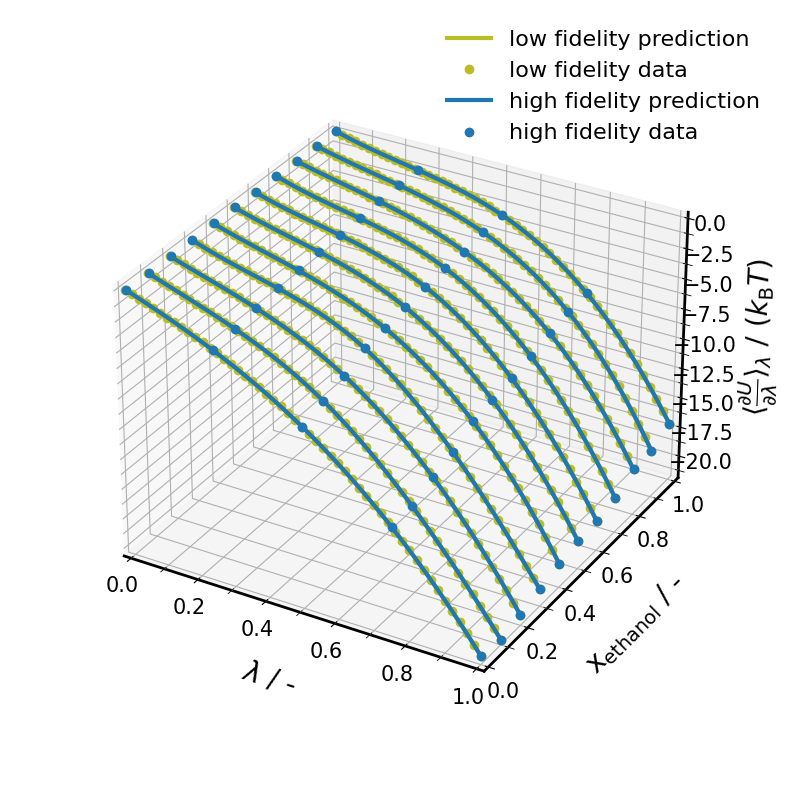


2D Multi-fidelity modeling for component: water



 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:144: RuntimeWarning:overflow encountered in square
 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:145: RuntimeWarning:overflow encountered in square
 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:146: RuntimeWarning:invalid value encountered in add
 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:484: RuntimeWarning:invalid value encountered in multiply
 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:487: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/2, f = -1833.3951815249088
Warning - optimization restart 2/2 failed

Low fidelity variance: 4961.534
Low fidelity lengthscales: 17.546, 9.597
High fidelity variance: 0.000
High fidelity lengthscales: 293.357, 203.448
Phi parameter: 1.000
Low fidelity noise: 0.000
High fidelity noise: 0.013


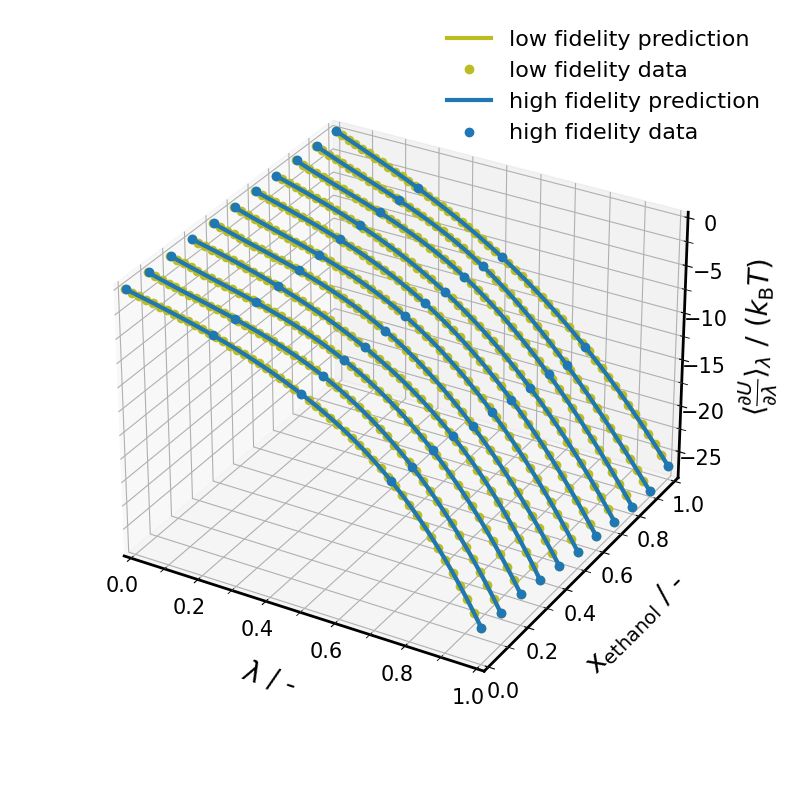

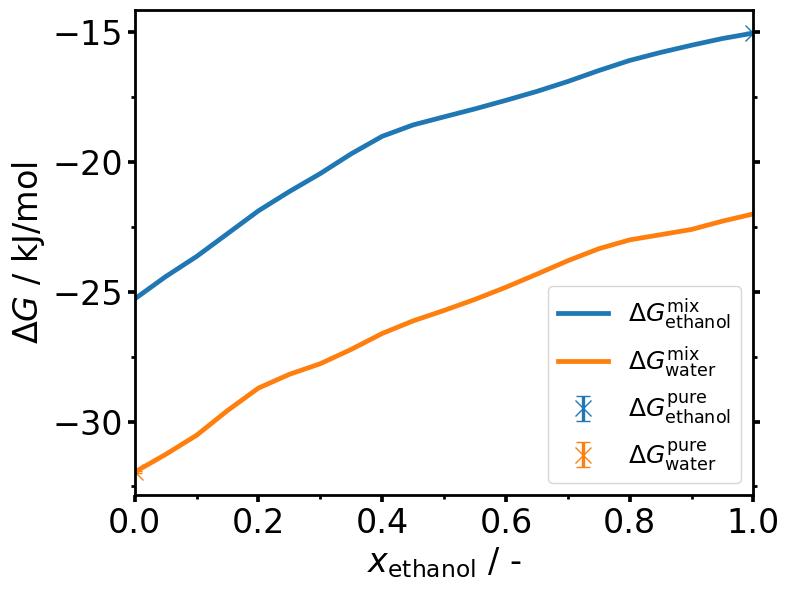

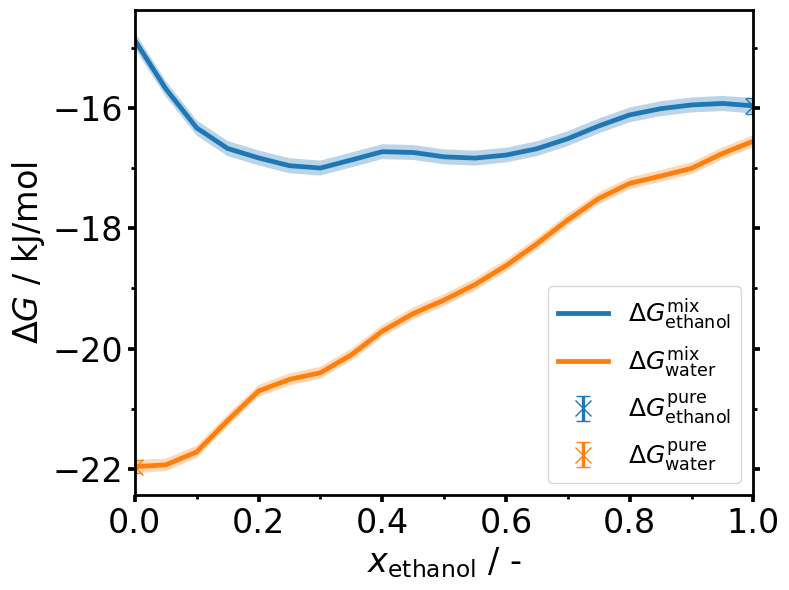

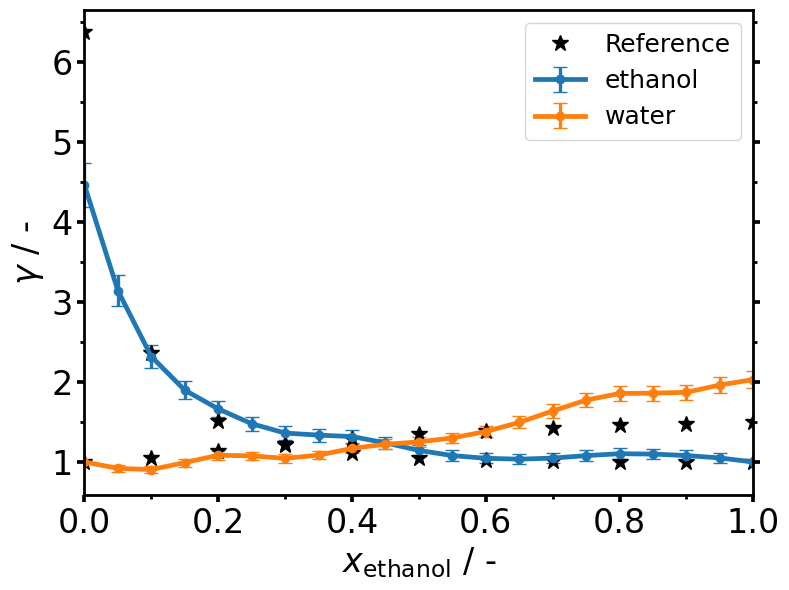

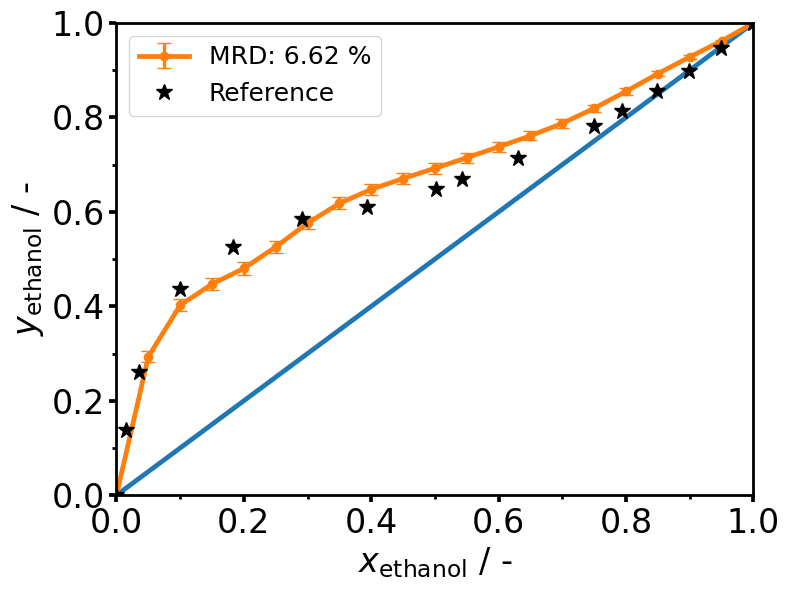

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


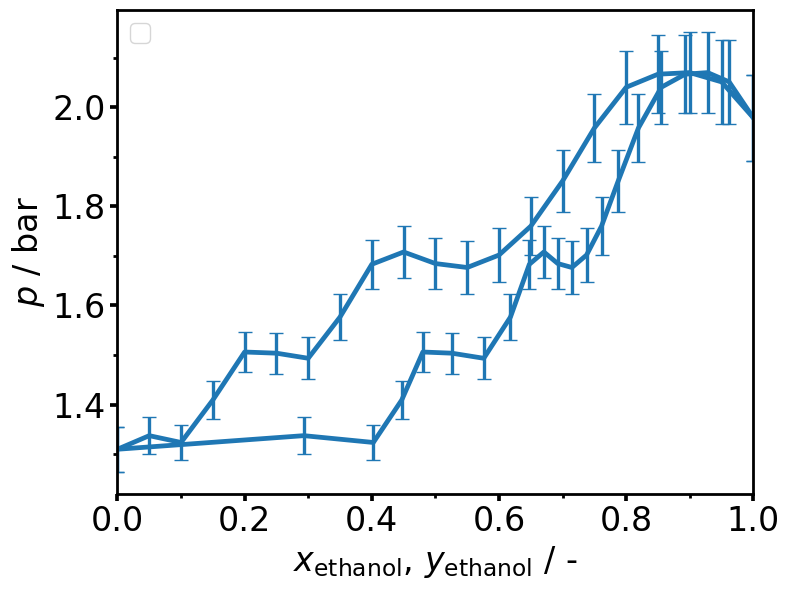

In [3]:
## Define output dictionary ##

results_dict = {}

#### Compute free solvation energy [J/mol] and gather mixture density [g/cm^3] in every composition ####

delta_G_mix, dG_std_mix, dens_mix, temperatures, x1 =  get_delta_fe(settings,print_out=show)

## Convert from mass density [g/cm^3] to molare density [mol/m^3] ##

Avg_mol_mass = np.array([np.sum( Mol_masses*np.array([x,(1-x)]) ) for x in x1 ])

dens_mix     = dens_mix / Avg_mol_mass * 10**6 

## Define pure component properties ##

delta_G_pure  = np.array([ delta_G_mix[0][-1], delta_G_mix[1][0] ])
dG_std_pure   = np.array([ dG_std_mix[0][-1], dG_std_mix[1][0] ])
dens_pure     = np.array([ dens_mix[-1], dens_mix[0] ])

#### Compute activity coefficients [-] ####

gamma, gamma_std = compute_gamma(x1,temperatures,delta_G_mix,delta_G_pure,
                                 dG_std_mix,dG_std_pure,dens_mix,dens_pure,settings,
                                 gamma_x_ref,gamma1_ref,gamma2_ref)


#### Compute vapor mole fraction of component one [-] ####

alpha, alpha_std, y1, y1_std = compute_vapor_mole_fraction(x1,temperatures,delta_G_mix,dG_std_mix,settings,x_ref,y_ref)


#### Compute p-x diagramm (if the temperature is constant), else plot the T-x diagramm ####

if settings["p_x"]:
    p_equib, p_equib_std    = compute_equilibrium_pressure(x1,y1,temperatures,delta_G_mix,dG_std_mix,dens_mix,settings,x_ref,y_ref,p_ref)
    results_dict["p_equib"] = [ [a.tolist() for a in p_equib], [a.tolist() for a in p_equib_std] ]
else:
    compute_equilibrium_temperatures(x1,temperatures,y1,y1_std,settings,x_ref,y_ref,t_ref)


#### Save computed properties in json file  ####

results_dict["deltaG"]    = [ [a.tolist() for a in delta_G_mix], [a.tolist() for a in dG_std_mix] ]
results_dict["dens_mole"] = [ [a.tolist() for a in dens_mix] ]
results_dict["dens_mass"] = [ [(a*b/1000).tolist() for a,b in zip(dens_mix,Avg_mol_mass)] ]
results_dict["gamma"]     = [ [a.tolist() for a in gamma], [a.tolist() for a in gamma_std] ]
results_dict["alpha"]     = [ [a.tolist() for a in alpha], [a.tolist() for a in alpha_std] ]
results_dict["y1"]        = [ [a.tolist() for a in y1], [a.tolist() for a in y1_std] ]
results_dict["x1"]        = [ a.tolist() for a in x1 ]

json_path = settings["json_save_path"]

work_json(json_path,results_dict,to_do="write")

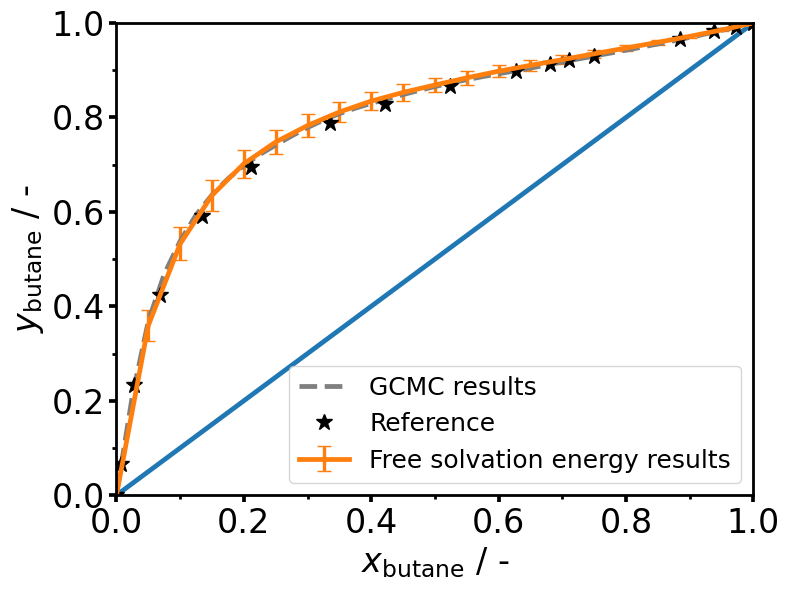

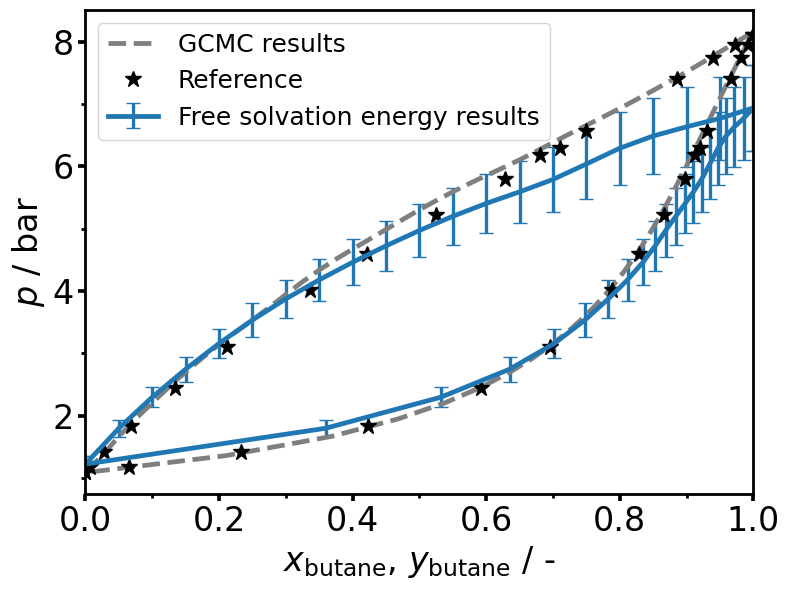

In [13]:
### Plot gcmc reference data ###

with open(main+"/"+mixture+"/"+dict_key+"/results/hr_results.json") as f_mc: hr_data = json.load(f_mc)

with open(main+"/"+mixture+"/"+dict_key+"/results/free_eng_pp_results.json") as f_fe: fe_data = json.load(f_fe)

## y-x ##
data   = [ [fe_data["x1"],fe_data["x1"]], [fe_data["x1"],fe_data["y1"][0],None,fe_data["y1"][1]], [hr_data["liquid"],hr_data["vapor"]], [x_ref,y_ref] ]

labels = [ "", "Free solvation energy results", "GCMC results", "Reference" , "$x_\mathrm{%s}$ / -"%settings["components"][0], "$y_\mathrm{%s}$ / -"%settings["components"][0] ]

colors = [ "tab:blue", "tab:orange", "tab:gray", "black" ]
ls     = [ "solid", "solid", "dashed", "None"]
marker = [ "None", "None", "None", "*" ]

save_path = main+"/"+mixture+"/"+dict_key+"/results/mc_thiele_w_GCMC.png"

plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0],[0.0,1.0]],linestyle=ls,markerstyle=marker)

## P-x ##

data   = [ [fe_data["x1"],fe_data["p_equib"][0],None,fe_data["p_equib"][1]], 
           [fe_data["y1"][0],fe_data["p_equib"][0],None,fe_data["p_equib"][1]],
           [hr_data["liquid"],hr_data["pressure"]],
           [hr_data["vapor"],hr_data["pressure"]], 
           [x_ref,p_ref], [y_ref,p_ref],
            ]

labels = [ "Free solvation energy results", "", "GCMC results", "", "Reference", "","$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(settings["components"][0],settings["components"][0]), "$p$ / bar" ]
colors = [ "tab:blue", "tab:blue", "tab:gray", "tab:gray", "black", "black" ]
ls     = [ "solid", "solid", "dashed", "dashed", "None", "None"]
marker = [ "None", "None", "None", "None", "*", "*" ]

save_path = main+"/"+mixture+"/"+dict_key+"/results/p_x_w_GCMC.png"

plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0]],linestyle=ls,markerstyle=marker)

 /tmp/ipykernel_8353/639043041.py:3: RuntimeWarning:invalid value encountered in divide
 /tmp/ipykernel_8353/639043041.py:4: RuntimeWarning:invalid value encountered in divide
 /tmp/ipykernel_8353/639043041.py:7: RuntimeWarning:invalid value encountered in divide
 /tmp/ipykernel_8353/639043041.py:8: RuntimeWarning:invalid value encountered in divide
 /tmp/ipykernel_8353/639043041.py:16: RuntimeWarning:invalid value encountered in divide
 /tmp/ipykernel_8353/639043041.py:17: RuntimeWarning:invalid value encountered in divide
 /tmp/ipykernel_8353/639043041.py:18: RuntimeWarning:invalid value encountered in divide


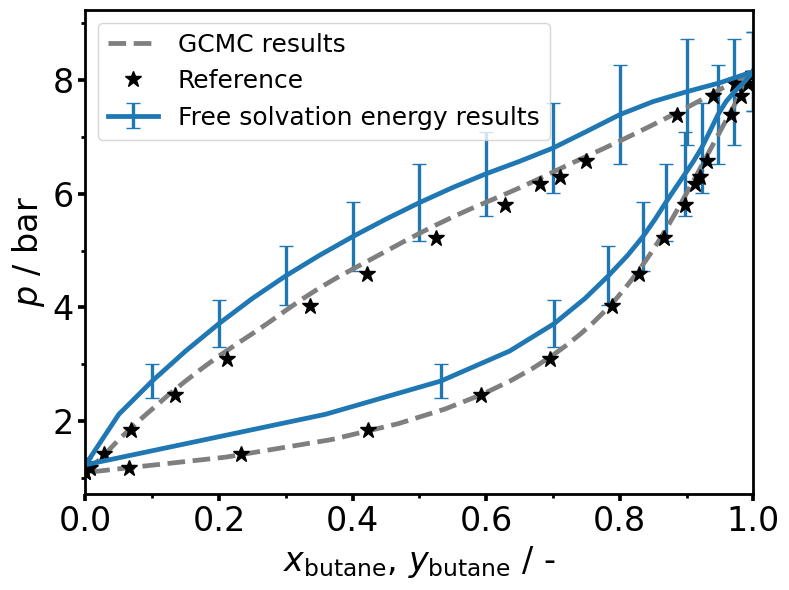

In [55]:
## Plot using p_sat2 from GCMC:

p_hat_error1 = np.sqrt( gamma_std[0]**2 * (x1*p_equib[-1]/y1)**2 + p_equib_std[-1]**2 * (x1*gamma[0]/y1)**2 + \
                        y1_std**2 * (-x1*gamma[0]*p_equib[-1]/y1**2)**2 )

# Error from x2 perspective
p_hat_error2 = np.sqrt( gamma_std[1]**2 * ((1-x1)*p_equib[0]/(1-y1))**2 + p_equib_std[0]**2 * ((1-x1)*gamma[1]/(1-y1))**2 + \
                    y1_std**2 * (-(1-x1)*gamma[1]*p_equib[0]/(1-y1)**2)**2 )


# Pressure from component 1 perspective and from component 2 perspective are equal except the boundaries, therefore total pressure #
# Takes mean of both in middle and take the boundaries of each when x1/x2 ≠ 0.0 #



p_hat_x1 = x1*gamma[0]*p_equib[-1]/y1
p_hat_x1 = x1*gamma[0]*hr_data["pressure"][-1]/y1
p_hat_x2 = (1-x1)*gamma[1]*p_equib[0]/(1-y1)

p_hat    = np.array( [p_hat_x2[0]] + list(np.mean([p_hat_x1[1:-1],p_hat_x2[1:-1]],axis=0)) + [p_hat_x1[-1]] )


p_hat_x1[0] = p_hat_x2[0]

# Same for error

# Total error: use error from x1 and only in x1=0 error from x2 or the other way arround (should be same in good simulation)

p_hat_error = np.array( [p_hat_error2[0]] + list( np.sqrt( (0.5*p_hat_error1[1:-1])**2 + (0.5*p_hat_error2[1:-1])**2 ) ) + [p_hat_error1[-1]] )

p_hat_error[np.array([1,3,5,7,9,11,13,15,17,19])] = None

data   = [ [fe_data["x1"],p_hat_x1,None,p_hat_error], 
           [fe_data["y1"][0],p_hat_x1,None,p_hat_error],
           [hr_data["liquid"],hr_data["pressure"]],
           [hr_data["vapor"],hr_data["pressure"]], 
           [x_ref,p_ref], [y_ref,p_ref],
            ]

labels = [ "Free solvation energy results", "", "GCMC results", "","Reference", "","$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(settings["components"][0],settings["components"][0]), "$p$ / bar" ]
colors = [ "tab:blue", "tab:blue", "tab:gray", "tab:gray", "black", "black" ]
ls     = [ "solid", "solid", "dashed", "dashed", "None", "None"]
marker = [ "None", "None", "None", "None", "*", "*" ]

save_path = main+"/"+mixture+"/"+dict_key+"/results/p_x_w_GCMC_shifted_p1.png"

plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0]],linestyle=ls,markerstyle=marker)